## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-006-001D-k-Nearest-Neighbor

In [1]:
from sklearn.neighbors import NearestNeighbors
import sklearn.neighbors as skn
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from random import sample
import matplotlib._color_data as mcd

In [2]:
ncnt1=4
ncnt2=8

In [3]:
np.random.seed(1968)
nrcnt=75
bdisplay=True

In [4]:
colors1 = np.array(list(sorted({name for name in mcd.CSS4_COLORS if "xkcd:" + name in mcd.XKCD_COLORS}, reverse=False)))
colors=np.random.choice(colors1,nrcnt)
if bdisplay:
    print(colors)

['gold' 'maroon' 'red' 'aqua' 'orangered' 'orangered' 'yellowgreen'
 'sienna' 'darkblue' 'silver' 'lavender' 'lightgreen' 'silver' 'red'
 'aqua' 'khaki' 'darkgreen' 'fuchsia' 'turquoise' 'goldenrod' 'red' 'navy'
 'khaki' 'ivory' 'fuchsia' 'magenta' 'aqua' 'olive' 'teal' 'red' 'silver'
 'magenta' 'tomato' 'coral' 'gold' 'olive' 'khaki' 'violet' 'beige'
 'goldenrod' 'tomato' 'red' 'goldenrod' 'salmon' 'azure' 'aquamarine'
 'ivory' 'navy' 'lavender' 'chocolate' 'sienna' 'yellow' 'indigo'
 'aquamarine' 'turquoise' 'navy' 'orangered' 'gold' 'teal' 'brown' 'olive'
 'grey' 'wheat' 'salmon' 'coral' 'lavender' 'coral' 'blue' 'indigo'
 'white' 'green' 'aquamarine' 'green' 'fuchsia' 'cyan']


In [5]:
fileName = '../../Data/Postcodes003.csv'
fileFullName = os.path.abspath(fileName)
print(fileFullName)

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Data\Postcodes003.csv


In [6]:
datarawdf = pd.read_csv(fileFullName, header=0, encoding = 'latin_1')
print(datarawdf.shape)
print(datarawdf.columns)

(155570, 7)
Index(['pincode', 'Name', 'Region', 'district', 'division', 'latitude',
       'longitude'],
      dtype='object')


In [7]:
indices = np.random.randint(0,datarawdf.shape[0],nrcnt)
datadf=datarawdf.loc[indices]
if bdisplay:
    print(datadf[['pincode', 'Name', 'latitude', 'longitude']])

        pincode                  Name  latitude  longitude
138615   222109    Dakkhinpatti Ranno   25.8536    82.5637
98235    713422                Begpur   23.0258    88.3583
18606    360360               Dedarva   22.2673    71.1616
88101    621203              Arasalur   10.9834    78.3116
62901    756081                  Remu   20.0081    85.5625
98925    700123              Talpukur   22.8848    88.3469
15798    385001                 Vasan   24.1951    72.4787
11498    782440             Koroiguri   25.8862    93.0109
46208    415105              Viravade   17.6931    74.4665
87104    643217            Donnington   11.4640    76.8729
18826    363660               Vavania   23.0055    70.6103
112994   821108              Bhadoula   25.0746    83.8548
45763    413253                Sohale   18.3187    75.1457
3488     534315               Talluru   17.4115    81.5907
155111   507136           Dharmavaram   18.4807    80.3931
117991   465220                Lahori   23.4482    76.64

In [8]:
Xdf = datadf[['latitude', 'longitude']].copy(deep=True)
if bdisplay:
    print(Xdf.shape)
    print(Xdf.columns)

(75, 2)
Index(['latitude', 'longitude'], dtype='object')


In [9]:
nbrs1 = NearestNeighbors(n_neighbors=ncnt1,
                         algorithm='auto',
                         n_jobs=-1,
                         metric='l2'                         
                       ).fit(Xdf)

distances1, indices1 = nbrs1.kneighbors(Xdf)

n1=nbrs1.kneighbors_graph(Xdf).toarray()

In [10]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices1)
    print('Distances')
    print('---------------')
    print(distances1)

    print('K-neighbors')
    print('---------------')
    print(n1)

Indices
---------------
[[ 0 45 56 66]
 [ 1  5 46 52]
 [ 2 10 32  6]
 [ 3 33 16 38]
 [ 4 69 55 18]
 [ 5  1 46 52]
 [ 6 26 32 48]
 [ 7 17 23 74]
 [ 8 12 20 21]
 [ 9 63  3 35]
 [10  2 32  6]
 [11 36 45  0]
 [12 20  8 21]
 [13 41 14 60]
 [14 60 13 41]
 [15 42 53 25]
 [16 38  3 33]
 [17 23  7 74]
 [18 69  4 34]
 [19 50 49 56]
 [20 12  8 21]
 [21 12  8 54]
 [22 65  9 63]
 [23 17  7 74]
 [24 62 31 14]
 [25 48 44 26]
 [26  6 48 25]
 [27 58 73 39]
 [28 46 52  1]
 [29 44 32 48]
 [30 51 72 71]
 [31 62 20 12]
 [32 29 44  6]
 [33 38  3 16]
 [34  5  1 46]
 [35 68 63 40]
 [36 11 43  0]
 [37 19 49 50]
 [38 16 33  3]
 [39 71 58 27]
 [40 33  3 35]
 [41 13 60 67]
 [42 15 53 47]
 [43 36 28 11]
 [44 29 48 25]
 [45  0 56 11]
 [46  1 52  5]
 [47 53 72 42]
 [48 25 44 29]
 [49 66 56 19]
 [50 19 37 56]
 [51 30 71 72]
 [52 46  1  5]
 [53 47 42 72]
 [54 29 21 32]
 [55 69  4 18]
 [56 66 49  0]
 [57 61 64 74]
 [58 39 27 71]
 [59 70 55  4]
 [60 14 41 13]
 [64 61 74  7]
 [62 31 24 15]
 [63  9 35  3]
 [64 61 74  7]
 

In [11]:
X = np.array(Xdf['latitude']).reshape(1,-1).T
if bdisplay:
    print(X.shape)

(75, 1)


In [12]:
Y = np.array(Xdf['longitude']).reshape(1,-1).T
if bdisplay:
    print(Y.shape)

(75, 1)


In [13]:
xmin=np.floor(min(X))
xmax=np.ceil(max(X))
ymin=np.floor(min(Y))
ymax=np.ceil(max(Y))
print(xmin,xmax,ymin,ymax)

[8.] [34.] [70.] [95.]


In [14]:
if n1.shape[0] > colors.shape[0]:
    step=int(np.ceil(n1.shape[0]/colors.shape[0]))
else:
    step=1

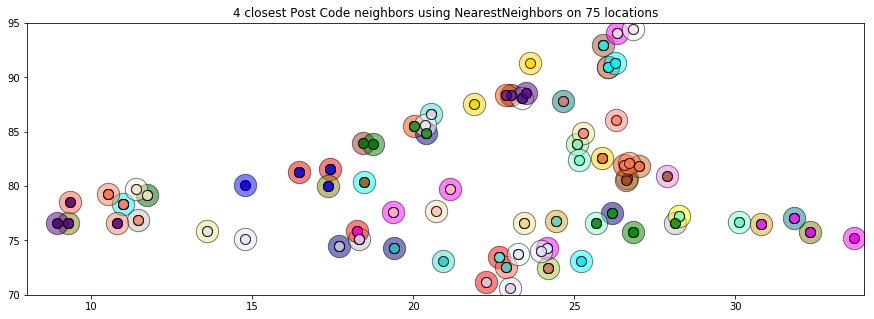

In [15]:
fig1=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors on %d locations' % (ncnt1, nrcnt)
plt.title(titlename)

k=-1
for p in range(0,n1.shape[0],step):  
    l=n1[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=1.0,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [16]:
nbrs2 = NearestNeighbors(n_neighbors=ncnt2, 
                        algorithm='auto',
                         n_jobs=-1,
                         metric='l2'            
                       ).fit(X)

distances2, indices2 = nbrs2.kneighbors(X)

n2=nbrs2.kneighbors_graph(X).toarray()

In [17]:
if bdisplay:
    print('Indices')
    print('---------------')
    print(indices2)
    print('Distances')
    print('---------------')
    print(distances2)

    print('K-neighbors')
    print('---------------')
    print(n2)

Indices
---------------
[[ 0  7 53 61 64 47 74 43]
 [ 1 10 32  5 44 46 29 15]
 [ 2 34 29  5 32 10  1 44]
 [ 3 63 38 33  9 16 40 35]
 [ 4 69 55 18 21 31 62 54]
 [ 5 32 10  1 29 44 46 15]
 [ 6 25 48 42 28 57 52 15]
 [ 7  0 61 64 53 47 74 43]
 [ 8 13 60 20 12 59 14 70]
 [ 9 38 16  3 63 33 22 40]
 [10  1 32  5 44 29 46 15]
 [11 45 26 36 28 53 42  0]
 [12 20 59 14 70  8 13 60]
 [13 60  8 20 12 41 59 14]
 [14 59 12 20 70  8 31 21]
 [15 52 46 57 44  1 10 48]
 [16  9 38  3 63 33 22 40]
 [17 43 74 47 56 64 61 50]
 [18 62 55 69 54  4 24 21]
 [19 50 66 56 72 23 17 43]
 [20 12 59 14 70  8 13 60]
 [21 31  4 70 14 59 69 55]
 [22 65 67 16  9 38  3 63]
 [23 72 66 19 49 50 56 17]
 [24 54 62 18 34 55 69  2]
 [25  6 48 42 28 57 52 15]
 [26 36 45 11 53 28  0  7]
 [27 58 73 39 71 51 30 37]
 [28 42 11  6 25 45 26 36]
 [29  5 32 10  1  2 44 46]
 [30 51 37 49 23 72 66 19]
 [31 21  4 70 14 59 69 55]
 [32  5 10  1 29 44 46 15]
 [33 63  3 38  9 40 16 35]
 [34  2 24 29 54  5 32 10]
 [35 40 68 33 63  3 38  9]
 [36

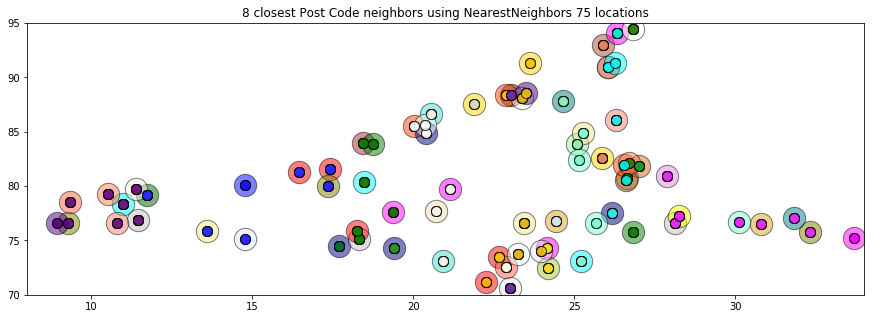

In [18]:
fig2=plt.figure(figsize=(15, 5))
titlename = '%d closest Post Code neighbors using NearestNeighbors %d locations' % (ncnt2, nrcnt)
plt.title(titlename)
k=-1
for p in range(0,n2.shape[0],step): 
    l=n2[p]
    k+=1
    c=colors[k]
    plt.scatter(X[p], 
                Y[p], 
                marker='o', 
                s=500,
                alpha=0.5, 
                edgecolors='k',
                antialiased=True,
                c=c
               )
    for i in range(l.shape[0]):
        if l[i] == 1:
            plt.scatter(X[i], 
                        Y[i], 
                        marker='o', 
                        s=100, 
                        alpha=0.8, 
                        edgecolors='k',
                        antialiased=True,
                        c=c
                       )
            plt.plot(X[p],X[i], 
                     Y[p],Y[i],
                     c=c,
                     alpha=0.6,
                     antialiased=True,
                     linestyle='--',
                     linewidth=3
                    )

plt.axis([xmin,xmax,ymin,ymax])
#plt.autoscale(enable=True, axis='x', tight=False)
plt.show()

In [19]:
imagepath = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06'])
print(imagepath)

if not os.path.exists(imagepath):
    os.makedirs(imagepath)
    
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001D-01.jpg'])
fig1.savefig(imagename, bbox_inches='tight')     
imagename = os.path.join(*[os.path.dirname(os.path.dirname(os.getcwd())),'Results','Chapter 06','Chapter-006-Example-001D-02.jpg'])
fig2.savefig(imagename, bbox_inches='tight') 

C:\Users\AndreVermeulen\Documents\My Book\apress\Industrialized Machine Learning\book\IML\Results\Chapter 06


## Done

In [20]:
import datetime
now = datetime.datetime.now()
print('Done!',str(now))

Done! 2019-04-19 08:28:16.269183
